In [40]:
import urllib.parse
import schwabdev 
import requests
import os
import time
import pandas as pd

### Testing Schwabdev

In [41]:
client = schwabdev.Client(app_key='Your app key here', app_secret='Your secret key here')

# now you can make any calls you want

#print(client.quote("AMD").ok())
print(client.quote("AMD").json()) # wanna make sure the request went through ok first


{'AMD': {'assetMainType': 'EQUITY', 'assetSubType': 'COE', 'quoteType': 'NBBO', 'realtime': True, 'ssid': 1449199007, 'symbol': 'AMD', 'fundamental': {'avg10DaysVolume': 37485740.0, 'avg1YearVolume': 59518210.0, 'divAmount': 0.0, 'divFreq': 0, 'divPayAmount': 0.0, 'divYield': 0.0, 'eps': 0.52912, 'fundLeverageFactor': 0.0, 'lastEarningsDate': '2024-07-30T04:00:00Z', 'peRatio': 165.51253}, 'quote': {'52WeekHigh': 227.3, '52WeekLow': 93.115, 'askMICId': 'ARCX', 'askPrice': 142.85, 'askSize': 1, 'askTime': 1726012786571, 'bidMICId': 'ARCX', 'bidPrice': 142.7, 'bidSize': 3, 'bidTime': 1726012786571, 'closePrice': 138.15, 'highPrice': 143.08, 'lastMICId': 'ARCX', 'lastPrice': 142.81, 'lastSize': 26, 'lowPrice': 137.25, 'mark': 142.84, 'markChange': 4.69, 'markPercentChange': 3.39486066, 'netChange': 4.66, 'netPercentChange': 3.37314513, 'openPrice': 139.06, 'postMarketChange': -0.03, 'postMarketPercentChange': -0.02100252, 'quoteTime': 1726012786571, 'securityStatus': 'Normal', 'totalVolume

Now I'm connected to schwabdev, and my client is fully connected. Here I'll make option API calls to try to figure out how to best organize options data from Schwab.

In [79]:
aapl_data = client.option_chains('AAPL',contractType='PUT',fromDate='2024-09-27',toDate='2024-09-27').json()
aapl_data['stock symbol'] = aapl_data.pop('symbol')
aapl_data

{'status': 'SUCCESS',
 'strategy': 'SINGLE',
 'interval': 0.0,
 'isDelayed': False,
 'isIndex': False,
 'interestRate': 4.738,
 'underlyingPrice': 219.69,
 'volatility': 29.0,
 'daysToExpiration': 0.0,
 'numberOfContracts': 51,
 'assetMainType': 'EQUITY',
 'assetSubType': 'COE',
 'isChainTruncated': False,
 'callExpDateMap': {},
 'putExpDateMap': {'2024-09-27:17': {'100.0': [{'putCall': 'PUT',
     'symbol': 'AAPL  240927P00100000',
     'description': 'AAPL 09/27/2024 100.00 P',
     'exchangeName': 'OPR',
     'bid': 0.0,
     'ask': 0.01,
     'last': 0.0,
     'mark': 0.01,
     'bidSize': 0,
     'askSize': 1,
     'bidAskSize': '0X1',
     'lastSize': 0,
     'highPrice': 0.0,
     'lowPrice': 0.0,
     'openPrice': 0.0,
     'closePrice': 0.0,
     'totalVolume': 0,
     'tradeTimeInLong': 0,
     'quoteTimeInLong': 1725998399550,
     'netChange': 0.0,
     'volatility': 111.815,
     'delta': 0.0,
     'gamma': 0.0,
     'theta': -0.002,
     'vega': 0.001,
     'rho': 0.0,
  

In [80]:
call_exp_date_map = aapl_data["callExpDateMap"]
put_exp_date_map = aapl_data["putExpDateMap"]

In [89]:
put_exp_date_map['2024-09-27:17']['100.0']

[{'putCall': 'PUT',
  'symbol': 'AAPL  240927P00100000',
  'description': 'AAPL 09/27/2024 100.00 P',
  'exchangeName': 'OPR',
  'bid': 0.0,
  'ask': 0.01,
  'last': 0.0,
  'mark': 0.01,
  'bidSize': 0,
  'askSize': 1,
  'bidAskSize': '0X1',
  'lastSize': 0,
  'highPrice': 0.0,
  'lowPrice': 0.0,
  'openPrice': 0.0,
  'closePrice': 0.0,
  'totalVolume': 0,
  'tradeTimeInLong': 0,
  'quoteTimeInLong': 1725998399550,
  'netChange': 0.0,
  'volatility': 111.815,
  'delta': 0.0,
  'gamma': 0.0,
  'theta': -0.002,
  'vega': 0.001,
  'rho': 0.0,
  'openInterest': 0,
  'timeValue': 0.005,
  'theoreticalOptionValue': 0.005,
  'theoreticalVolatility': 29.0,
  'optionDeliverablesList': [{'symbol': 'AAPL',
    'assetType': 'STOCK',
    'deliverableUnits': 100.0}],
  'strikePrice': 100.0,
  'expirationDate': '2024-09-27T20:00:00.000+00:00',
  'daysToExpiration': 17,
  'expirationType': 'W',
  'lastTradingDay': 1727481600000,
  'multiplier': 100.0,
  'settlementType': 'P',
  'deliverableNote': '100

In [90]:
pd.json_normalize(put_exp_date_map['2024-09-27:17']['100.0'])

,putCall,symbol,description,exchangeName,bid,ask,last,mark,bidSize,askSize,...,intrinsicValue,extrinsicValue,optionRoot,exerciseType,high52Week,low52Week,nonStandard,pennyPilot,inTheMoney,mini
0,PUT,AAPL 240927P00100000,AAPL 09/27/2024 100.00 P,OPR,0.0,0.01,0.0,0.01,0,1,...,-120.11,120.11,AAPL,A,0.0,0.0,False,True,False,False


In [71]:
for exp,chain in put_exp_date_map.items():
    # print(exp)
    # print(chain)
    for strike, options in chain.items():
        for opt in options:
            symbol = opt['symbol']
            print(strike)
            print(symbol)

100.0
AAPL  240927P00100000
105.0
AAPL  240927P00105000
110.0
AAPL  240927P00110000
115.0
AAPL  240927P00115000
120.0
AAPL  240927P00120000
125.0
AAPL  240927P00125000
130.0
AAPL  240927P00130000
135.0
AAPL  240927P00135000
140.0
AAPL  240927P00140000
145.0
AAPL  240927P00145000
150.0
AAPL  240927P00150000
155.0
AAPL  240927P00155000
160.0
AAPL  240927P00160000
165.0
AAPL  240927P00165000
170.0
AAPL  240927P00170000
175.0
AAPL  240927P00175000
180.0
AAPL  240927P00180000
185.0
AAPL  240927P00185000
190.0
AAPL  240927P00190000
195.0
AAPL  240927P00195000
197.5
AAPL  240927P00197500
200.0
AAPL  240927P00200000
202.5
AAPL  240927P00202500
205.0
AAPL  240927P00205000
207.5
AAPL  240927P00207500
210.0
AAPL  240927P00210000
212.5
AAPL  240927P00212500
215.0
AAPL  240927P00215000
217.5
AAPL  240927P00217500
220.0
AAPL  240927P00220000
222.5
AAPL  240927P00222500
225.0
AAPL  240927P00225000
227.5
AAPL  240927P00227500
230.0
AAPL  240927P00230000
232.5
AAPL  240927P00232500
235.0
AAPL  240927P0

In [58]:
exp_chain = client.option_expiration_chain('AAPL').json()
exp_chain

{'expirationList': [{'expirationDate': '2024-09-13',
   'daysToExpiration': 3,
   'expirationType': 'W',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirationDate': '2024-09-20',
   'daysToExpiration': 10,
   'expirationType': 'S',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirationDate': '2024-09-27',
   'daysToExpiration': 17,
   'expirationType': 'W',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirationDate': '2024-10-04',
   'daysToExpiration': 24,
   'expirationType': 'W',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirationDate': '2024-10-11',
   'daysToExpiration': 31,
   'expirationType': 'W',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirationDate': '2024-10-18',
   'daysToExpiration': 38,
   'expirationType': 'S',
   'settlementType': 'P',
   'optionRoots': 'AAPL',
   'standard': True},
  {'expirat

In [62]:
for expiration in exp_chain['expirationList']:
    print(expiration['expirationDate'])
    print(expiration['daysToExpiration'])

2024-09-13
3
2024-09-20
10
2024-09-27
17
2024-10-04
24
2024-10-11
31
2024-10-18
38
2024-10-25
45
2024-11-15
66
2024-12-20
101
2025-01-17
129
2025-02-21
164
2025-03-21
192
2025-04-17
219
2025-06-20
283
2025-08-15
339
2025-09-19
374
2025-12-19
465
2026-01-16
493
2026-06-18
646
2026-12-18
829


In [76]:
dates_frame = pd.json_normalize(exp_chain['expirationList'], sep='_')
dates_frame

,expirationDate,daysToExpiration,expirationType,settlementType,optionRoots,standard
0,2024-09-13,3,W,P,AAPL,True
1,2024-09-20,10,S,P,AAPL,True
2,2024-09-27,17,W,P,AAPL,True
3,2024-10-04,24,W,P,AAPL,True
4,2024-10-11,31,W,P,AAPL,True
5,2024-10-18,38,S,P,AAPL,True
6,2024-10-25,45,W,P,AAPL,True
7,2024-11-15,66,S,P,AAPL,True
8,2024-12-20,101,S,P,AAPL,True
9,2025-01-17,129,S,P,AAPL,True


In [78]:
dates = dates_frame['expirationDate'].to_list()
dates

['2024-09-13',
 '2024-09-20',
 '2024-09-27',
 '2024-10-04',
 '2024-10-11',
 '2024-10-18',
 '2024-10-25',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18']

In [ ]:
df = pd.json_normalize()

In [9]:
# Flatten the nested JSON data into a DataFrame
df = pd.json_normalize(call_exp_date_map, sep='_')

# Extract only the option symbols
aapl_options = df.filter(like='symbol').stack().reset_index(drop=True)
aapl_options

Series([], dtype: float64)

In [15]:
call_exp_date_map

{'2024-09-13:3': {'100.0': [{'putCall': 'CALL',
    'symbol': 'AAPL  240913C00100000',
    'description': 'AAPL 09/13/2024 100.00 C',
    'exchangeName': 'OPR',
    'bid': 118.9,
    'ask': 121.45,
    'last': 117.1,
    'mark': 120.18,
    'bidSize': 30,
    'askSize': 30,
    'bidAskSize': '30X30',
    'lastSize': 0,
    'highPrice': 117.1,
    'lowPrice': 117.1,
    'openPrice': 0.0,
    'closePrice': 121.05,
    'totalVolume': 1,
    'tradeTimeInLong': 1725976089525,
    'quoteTimeInLong': 1725998399711,
    'netChange': -3.95,
    'volatility': 262.665,
    'delta': 1.0,
    'gamma': 0.0,
    'theta': -0.054,
    'vega': 0.0,
    'rho': 0.008,
    'openInterest': 0,
    'timeValue': -3.01,
    'theoreticalOptionValue': 120.268,
    'theoreticalVolatility': 29.0,
    'optionDeliverablesList': [{'symbol': 'AAPL',
      'assetType': 'STOCK',
      'deliverableUnits': 100.0}],
    'strikePrice': 100.0,
    'expirationDate': '2024-09-13T20:00:00.000+00:00',
    'daysToExpiration': 3,
 

In [22]:
base_api_url = "https://api.schwabapi.com"

In [23]:
def _params_parser(params):
        """
        Removes None (null) values
        :param params: params to remove None values from
        :type params: dict
        :return: params without None values
        :rtype: dict
        """
        for key in list(params.keys()):
            if params[key] is None: del params[key]
        return params

In [ ]:
requests.get(f'{base_api_url}/marketdata/v1/{urllib.parse.quote("AMD")}/quotes',
                            headers={'Authorization': f'Bearer {None}'},
                            params=_params_parser({'fields': ["all"]}),
                            timeout=5)

### Testing the options pricing library:

In [91]:
from optlib.gbs import american, black_scholes
import matplotlib.pyplot as plt
import numpy as np

American options using Bjerksund and Stensland closed-form approximation:


In [92]:
"""Pricing function for American-style options.

Price American-style options using the Bjerksund-Stensland (2002) closed-form
approximation.

Args:
    option_type (str): Type of the option. "p" for put and "c" for call options.
    fs (float): Price of underlying asset.
    x (float): Strike price.
    t (float): Time to expiration in years. 1 for one year, 0.5 for 6 months.
    r (float): Risk free rate.
    q (float): Dividend payment. Set q=0 for non-dividend paying options.
    v (float): Implied volatility.

Returns:
    value (float): Price of the option.
    delta (float): First derivative of value with respect to price of underlying.
    gamma (float): Second derivative of value w.r.t price of underlying.
    theta (float): First derivative of value w.r.t. time to expiration.
    vega (float): First derivative of value w.r.t. implied volatility.
    rho (float): First derivative of value w.r.t. risk free rates.
"""

'Pricing function for American-style options.\n\nPrice American-style options using the Bjerksund-Stensland (2002) closed-form\napproximation.\n\nArgs:\n    option_type (str): Type of the option. "p" for put and "c" for call options.\n    fs (float): Price of underlying asset.\n    x (float): Strike price.\n    t (float): Time to expiration in years. 1 for one year, 0.5 for 6 months.\n    r (float): Risk free rate.\n    q (float): Dividend payment. Set q=0 for non-dividend paying options.\n    v (float): Implied volatility.\n\nReturns:\n    value (float): Price of the option.\n    delta (float): First derivative of value with respect to price of underlying.\n    gamma (float): Second derivative of value w.r.t price of underlying.\n    theta (float): First derivative of value w.r.t. time to expiration.\n    vega (float): First derivative of value w.r.t. implied volatility.\n    rho (float): First derivative of value w.r.t. risk free rates.\n'

In [93]:
american('c', 140, 160, 0.5, 0.0391, 0, 0.17) 

(1.6348160078982303,
 0.18724452807829522,
 0.01598015127906814,
 -5.486953686049446,
 26.62293203092753,
 12.28970896153155)

In [94]:
black_scholes('c', 140, 160, 0.5, 0.0391, 0.17)

(1.6348160078982303,
 0.18724452807829522,
 0.01598015127906814,
 -5.486953686049446,
 26.62293203092753,
 12.28970896153155)

Note that for OTM options, the price is the same; early exercise of an American option confers no additional benefit. 

In [95]:
american('p', 80, 160, 0.05, 0.0391, 0, 0.17) 

(80,
 0.9980469097677652,
 7.456029543308542e-74,
 6.243781467507139,
 1.6224320286239391e-71,
 4.0)

In [96]:
black_scholes('p', 80, 160, 0.5, 0.0391, 0.17)

(76.90237793895162,
 -0.9999999851745582,
 8.808472493151479e-09,
 6.13488211643149,
 4.791809036274406e-06,
 -78.45118837645813)

Looks like they're essentially calculated the same? Early exercise really does not confer much benefit. 

Except, when it's a put. 

In [97]:
type = 'p'
K = 160
T = 0.5
r_f = 0.0391
IV = 0.17

s_range = np.linspace(1,300,500)

In [98]:
amer_values = []
eur_values = []

for s in s_range:
    amer_val = american(type, s, K, T, r_f, 0, IV)[0]
    eur_val = black_scholes(type, s, K, T, r_f, IV)[0]

    amer_values.append(amer_val)
    eur_values.append(eur_val)



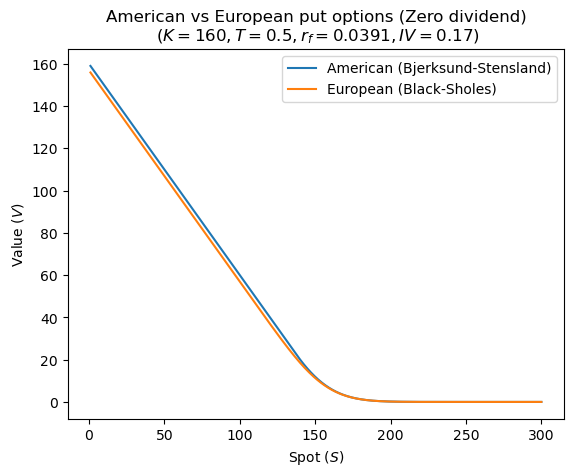

In [99]:
plt.plot(s_range,amer_values, label = 'American (Bjerksund-Stensland)')
plt.plot(s_range, eur_values,  label = 'European (Black-Sholes)')
plt.xlabel('Spot ($S$)')
plt.ylabel('Value ($V$)')
plt.title('American vs European put options (Zero dividend)\n ($K={}, T={}, r_f = {}, IV={}$)'\
          .format(K,T,r_f,IV))
plt.legend()

Testing with the AAPL stock data saved in the csv:

In [100]:
import pandas as pd
from Math import Long_Call, Long_Put, hist_volatility

In [101]:
aapl_data = pd.read_csv('AAPL.csv')
aapl_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-24,158.860001,160.339996,157.850006,160.250000,159.399185,59196500
1,2023-03-27,159.940002,160.770004,157.869995,158.279999,157.439621,52390300
2,2023-03-28,157.970001,158.490005,155.979996,157.649994,156.812973,45992200
3,2023-03-29,159.369995,161.050003,159.350006,160.770004,159.916412,51305700
4,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700
...,...,...,...,...,...,...,...
246,2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
247,2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200
248,2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
249,2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300


In [102]:
aapl_data['Date'].unique()

array(['2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
       '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
       '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11',
       '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-17',
       '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21',
       '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27',
       '2023-04-28', '2023-05-01', '2023-05-02', '2023-05-03',
       '2023-05-04', '2023-05-05', '2023-05-08', '2023-05-09',
       '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15',
       '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
       '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
       '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01',
       '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07',
       '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
       '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20',
       '2023-06-21', '2023-06-22', '2023-06-23', '2023-

In [103]:
IV = hist_volatility(aapl_data['Close'])
IV

0.1933716611175979

In [104]:
S = aapl_data['Close'].iloc[-1]

In [105]:
aapl_call = american('c', S, 180, 0.5, 0.0391, 0, IV)
aapl_call

(7.537546501914306,
 0.45650380682966496,
 0.016834716402548522,
 -12.122172474632796,
 48.31014690233095,
 35.55446444109828)

Notes for 9/2/2024: 
- Will need to make sure that the Schwab API can give us access to Implied Volatility measures. 
- Speaking of Schwab API, will have to refactor the code to work with Schwab instead of yahoofin
- Also interested if we have other present options data from Schwab, we could include graphs of volatility skews as well as volatility term structures that indicate future volatile events. 

Will have to wait until I get the approval from Schwab Developer to use the app. 